# Multi-dimensional arrays

A `numpy.ndarray` is the more complete term for a `numpy` `array` object. Up until this point we have mainly been dealing with and using one dimensional arrays. Numpy arrays (unlike lists) have the concept of shape whicih means they can be multi-dimensional. This means they can represent a grid (2D), a cuboid (3D) and so forth.

The code below generates a `numpy.array` object containing random numbers. This is a 2D array with a 3 x 3 shape:

In [2]:
from numpy import random

rng = random.default_rng(seed=24)

In [3]:
import numpy as np

shape = (3,3)
array1 = rng.random(shape)
print(array1.shape)
print(array1)

(3, 3)
[[0.33026884 0.40517732 0.57473782]
 [0.50639977 0.56421251 0.56968731]
 [0.87411653 0.08643046 0.74247527]]


We can select one element from this array using the following syntax. We still use square brackets and pass an index value but now we can pass values for each dimension seperated by a comma (`,`). This index is selecting the third column within the second row:

In [3]:
print(array1[1, 2])

0.5696873105084019


Using slicing (*Start:Stop*) syntax you can select an entire dimension at once by omitting both the Start and Stop values and just using `:`. You can see how this works if you try the slice with just the Start or just the Stop e.g.

In [4]:
print(array1[:2])
print(array1[2:])

[[0.33026884 0.40517732 0.57473782]
 [0.50639977 0.56421251 0.56968731]]
[[0.87411653 0.08643046 0.74247527]]


Not including a Start index includes values from the beginning of the array/list etc. up to (but not including) the Stop.

Not including a Stop index reads from the Start to the end of the array/list etc.

So just using `:` with no Start or Stop selects all elements for that dimension.

This following syntax returns first row (first row, every column):

In [5]:
print(array1[0,:])

[0.33026884 0.40517732 0.57473782]


And this would return the first column (every row, first column):

In [6]:
print(array1[:,0])

[0.33026884 0.50639977 0.87411653]


`numpy` `array` objects store data in **row-major** order. Essentially this means for a 2D index this would be the equivalent of [y, x] rather than [x, y].

## Basic properties of multi-dimensional arrays

### Shape

The **shape** of a multi-dimensional array is a tuple that describes the size of each dimension. For example, a 2D array with 3 rows and 4 columns has a shape of `(3, 4)`. You can access the shape of an array using the `.shape` attribute.

We can use many of the array initialisation functions we haver seen for 1d arrays also to create multi-dimensional arrays. For example, we can use `np.zeros` to create a 2D array of zeros, or `np.ones` to create a 2D array of ones. We can also use `np.random.rand` to create a 2D array of random numbers.


In [29]:
array_of_zeros = np.zeros(shape=(2, 3)) # 2 rows, 3 columns

In [30]:
np.ones_like(array_of_zeros)

array([[1., 1., 1.],
       [1., 1., 1.]])


### Axis and Rank

A multi-dimensional array has multiple dimensions, each of which can be thought of as an **axis**. The number of dimensions is called the **rank** of the array. For example, a 2D array has a rank of 2, while a 3D array has a rank of 3. It is accessible via the `.ndim` attribute.

We typically call a rank 2 array a **matrix**. A rank 3 array (or higher) is often called a **tensor**. 

In [42]:
rng = random.default_rng(seed=24)
random_matrix = rng.uniform(-1,1,size=(2,5)) # random floats between -1 and 1, 2 rows, 5 columns
random_matrix

array([[-0.33946233, -0.18964537,  0.14947564,  0.01279953,  0.12842501],
       [ 0.13937462,  0.74823306, -0.82713908,  0.48495054,  0.64073453]])

In [43]:
random_matrix.ndim # two dimensions, rank 2, a matrix


2

In [ ]:
random_tensor = rng.integers(0,3,size=(2,3,4)) # random integes in [0,3), 2x3x4 tensor
random_tensor

array([[[0, 2, 1, 1],
        [2, 2, 0, 0],
        [1, 2, 0, 1]],

       [[2, 0, 1, 0],
        [0, 1, 1, 0],
        [0, 1, 0, 1]]])

In [44]:
random_tensor.ndim

3

We can perform operations along specific axes of a multi-dimensional array. For example, we can sum all the elements along a specific axis using the `np.sum` function with the `axis` parameter.

In [48]:
small_matrix = rng.integers(0,2,size=(3,2)) 
small_matrix

array([[0, 0],
       [1, 0],
       [1, 1]])

In [49]:
small_matrix.sum(axis=0) # sum along the first axis (rows)

array([2, 1])

In [ ]:
small_matrix.sum(axis=1) # sum along the second axis (columns), can you explain the resulting shape?

array([0, 1, 2])

One can do the same also with useful statistical descriptors such as `np.mean`, `np.std`, etc.

In [52]:
np.mean(small_matrix, axis=0) # mean along the first axis (rows)

array([0.66666667, 0.33333333])

### Slicing

Slicing works similarly to 1D arrays, but you can slice along multiple axes. For example, you can slice a 2D array to get a submatrix or a specific row or column.

In [53]:
small_matrix[:, 0] # all rows, first column

array([0, 1, 1])

In [54]:
small_matrix[:2,:] # first two rows, all columns

array([[0, 0],
       [1, 0]])

In [55]:
small_matrix[::-1,:1]

array([[1],
       [1],
       [0]])

### Reshaping and flattening

The last example show an inetresting case: we extracted a single column from the matrix, but it is still a 2D array with shape `(3, 1)`.

In [57]:
selection = small_matrix[::-1,:1]

print("shape", selection.shape)
print("rank", selection.ndim)

shape (3, 1)
rank 2


What if we wanted a truly 1d array (rank 1)? We need to **reshape** the array. 

We can use the `np.reshape` function to change the shape of an array without changing its data. For example, we can reshape a 2D array into a 1D array or vice versa.

Reshape takes a tuple of the new shape as an argument. If you want to flatten an array (convert it to a 1D array), you can use `-1` as one of the dimensions, which tells NumPy to infer the size of that dimension based on the total number of elements.

In [ ]:
selection = small_matrix[::-1,:1]
reshaped_selection = selection.reshape((3,))  # reshape to a 1D array excplicitly
print("reshaped shape", reshaped_selection.shape)
print("reshaped rank", reshaped_selection.ndim)
print("reshaped selection", reshaped_selection)

reshaped shape (3,)
reshaped rank 1
reshaped selection [0 1 1]


In [70]:
#same code as above, but with inferred shape
selection = small_matrix[::-1,:1]
reshaped_selection = selection.reshape(-1)  # infererd shape
print("reshaped shape", reshaped_selection.shape)
print("reshaped rank", reshaped_selection.ndim)
print("reshaped selection", reshaped_selection)

reshaped shape (3,)
reshaped rank 1
reshaped selection [0 1 1]


Another way to cast a multi-dimensional array to a 1D array is to use the `np.ravel()` function, which returns a flattened view of the array (not a copy).

In [92]:
a_matrix = rng.integers(0,10,size=(2,3)) # random integers in [0,10), 2x3 matrix
print("Original matrix:\n", a_matrix)
ravelled_view = a_matrix.ravel()
print("Flattened view:", ravelled_view)  # flatten the array to a 1D array

Original matrix:
 [[3 4 0]
 [2 1 6]]
Flattened view: [3 4 0 2 1 6]


If we modify the view, we modify the original array as well.

In [91]:
ravelled_view[0] = 100  # modify the view
print("Modified view:", ravelled_view)  # the view is modified
print("Original array:", a_matrix)  # the original array is modified as well

Modified view: [100   7   8   1   0   7]
Original array: [[1 6 5]
 [4 7 4]]


To obtain a completely independent flattened copy of the array, you can use the `np.flatten()` method, which returns a copy of the array in a 1D format.

In [90]:
a_matrix = rng.integers(0,10,size=(2,3)) # random integers in [0,10), 2x3 matrix
print("The original:\n",a_matrix)
flattened_copy = a_matrix.flatten()
print("Flattened:",flattened_copy)  # flatten the array to a 1D array
flattened_copy[0] = 100  # modify the copy
print("Flattened after modification:",flattened_copy)  # the copy is modified
print("The original:\n",a_matrix)  # the original array is not modified

The original:
 [[1 6 5]
 [4 7 4]]
Flattened: [1 6 5 4 7 4]
Flattened after modification: [100   6   5   4   7   4]
The original:
 [[1 6 5]
 [4 7 4]]


We can also do the opposite and increase the rank of an array by reshaping it. For example, we can reshape a 1D array into a 2D array with one column or one row.

In [95]:
one_dimensional_array = rng.integers(0,10,size=(5,))  # random integers in [0,10), 1D array
print("One-dimensional array:", one_dimensional_array)
reshaped_array = one_dimensional_array.reshape((5,1))  # reshape to a  2D array with one column
print("Reshaped array:\n", reshaped_array)

One-dimensional array: [7 7 8 1 5]
Reshaped array:
 [[7]
 [7]
 [8]
 [1]
 [5]]


### Broadcasting

Combining arrays of different shapes is possible in NumPy using a feature called **broadcasting**. Broadcasting allows NumPy to perform operations on arrays of different shapes by automatically expanding the smaller array to match the shape of the larger one.

In [93]:
# Minimal broadcasting example: rank 2 (matrix) with rank 1 (vector)
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])
vector = np.array([10, 20, 30])

# Broadcasting addition: vector is added to each row of the matrix
result = matrix + vector
print("Matrix:\n", matrix)
print("Vector:", vector)
print("Result of broadcasting:\n", result)

Matrix:
 [[1 2 3]
 [4 5 6]]
Vector: [10 20 30]
Result of broadcasting:
 [[11 22 33]
 [14 25 36]]


You can reshape a 1D array to a column or row vector and use broadcasting to expand it into a large table. For example, to create a table where each row is the original 1D array, or each column is the original array:


In [ ]:
one_dimensional_array = np.linspace(1, 5, num=5)  # create a 1D array with 5 elements
print("One-dimensional array:", one_dimensional_array)
# Expand one_dimensional_array to a table with 5 rows and 5 columns
row_vector = one_dimensional_array.reshape(1, -1)  # shape (1, 5)
column_vector = one_dimensional_array.reshape(-1, 1)  # shape (5, 1)

# Broadcasting to create a table
table = column_vector + row_vector
print("BroadcastedTable:\n",table)


One-dimensional array: [1. 2. 3. 4. 5.]
Broadcasted Table:
 [[ 1.  2.  3.  4.  5.]
 [ 2.  4.  6.  8. 10.]
 [ 3.  6.  9. 12. 15.]
 [ 4.  8. 12. 16. 20.]
 [ 5. 10. 15. 20. 25.]]


## Two-dimensional arrays as matrices: some linear algebra

Two-dimensional arrays are often used to represent matrices or images. In a matrix, each element can be accessed using two indices: 
- one for the row 
- one for the column. 


A matrix is a rectangular array of numbers, symbols, or expressions arranged in rows and columns and is an essential concept in **linear algebra**.

For examplle, let's consider the simple system of simultaneous equations:

$$ \begin{align*}
2x + 3y +z &= 5 \\
4x - y &= 1 \\
2y +z &= 3
\end{align*} $$

This can be represented in matrix form as:
$$ \begin{bmatrix}
2 & 3 &1  \\
4 & -1 &0 \\
0 & 2 &1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
z
\end{bmatrix}
=
\begin{bmatrix}5 \\
1\\
3
\end{bmatrix} $$   

And if we call $A$ the matrix of coefficients, $\mathbf{x}$ the vector of variables, and $b$ the vector of constants, we can write this as:
$$ A \mathbf{x} = \mathbf{b} $$

where $$A = \begin{bmatrix}
2 & 3 &1  \\
4 & -1 &0 \\
0 & 2 &1
\end{bmatrix}, \quad
\mathbf{x} = \begin{bmatrix}
x \\
y\\
z
\end{bmatrix}, \quad
\mathbf{b} = \begin{bmatrix}
5 \\
1\\
3
\end{bmatrix} $$            

A key result of linear algebra is that if $A$ is invertible, we can solve for $\mathbf{x}$ by multiplying both sides of the equation by the inverse of $A$:
$$ \mathbf{x} = A^{-1} \mathbf{b} $$

where $A^{-1}$ is the inverse of matrix $A$.

NumPy has a dedicated linear algebra submodule called `numpy.linalg` that provides functions for performing various linear algebra operations, including matrix inversion, solving systems of equations, and computing eigenvalues and eigenvectors.



In [10]:
A = np.array([[2, 3,1], [4, -1,0],[0,2,1]])
b = np.array([[5], [1], [3]]) # we use double brackets to create a column vector
print("Matrix A:\n", A)
print("Vector b:\n", b)

Matrix A:
 [[ 2  3  1]
 [ 4 -1  0]
 [ 0  2  1]]
Vector b:
 [[5]
 [1]
 [3]]


The linear algebra submodule has a function called `solve` which can be used to solve the above equation efficiently:

In [11]:
x = np.linalg.solve(A, b)

x

array([[0.5],
       [1. ],
       [1. ]])

But we can use numpy to verify that this is correct. We can use the symbol `@` to perform matrix multiplication in numpy. 

In [12]:
A @ x

array([[5.],
       [1.],
       [3.]])

We can also directly calculate the inverse of a matrix using the `inv` function from the `numpy.linalg` and use it to solve the equation

In [18]:
x = np.linalg.inv(A) @ b

x

array([[0.5],
       [1. ],
       [1. ]])

All the most common linear algebra operations are available in the `numpy.linalg` submodule:

- tranpose

In [16]:
b.T

array([[5, 1, 3]])

- scalar (dot) product (which takes two vectors and returns a scalar)

In [17]:
np.dot(b.T,b)

array([[35]])

- cross product

In [24]:
np.cross(b.T, b.T) #takes row vectors and returns a row vector

array([[0, 0, 0]])

Linear algebra applications are beyond the scope of this course (so, there will be **no assessment of these**), but they are widely used in various fields such as physics, computer science, and engineering. For example, they are essential in computer graphics for transformations, in machine learning for optimization, and in physics for solving systems of equations. So it is important for you to know that all these can be implemented efficiently using numpy.

## Matrices as images

A two-dimensional table of numbers can also be used to represent an image. Each number in the table corresponds to a pixel in the image, and the value of the number represents the color or intensity of that pixel.

`matplotlib` provides a convenient way to visualize 2D arrays as images. The `matshow` function can be used to display a 2D matrix as an image, where the values in the array are mapped to colors.

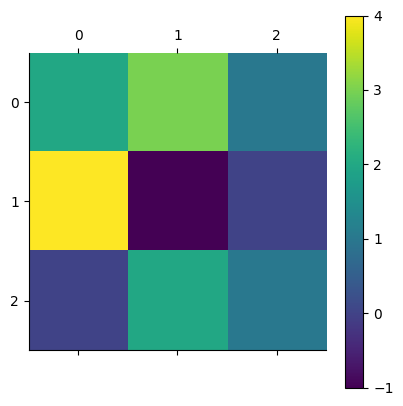

In [26]:
import matplotlib.pyplot as plt
plt.matshow(A)
plt.colorbar()